In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

In [2]:
data = pd.read_csv("csv/logistic-regression.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop(["Unnamed: 32","id"],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [8]:
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [9]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [10]:
x_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
# normalization : (x - min(x) / max(x)-min(x) )
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train,  x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 455)
x_test:  (30, 114)
y_train:  (455,)
y_test:  (114,)


In [13]:
x_train

,68,181,63,248,60,15,290,137,155,517,...,330,214,466,121,20,71,106,270,435,102
radius_mean,0.096928,0.667755,0.103744,0.173648,0.150930,0.357755,0.351602,0.210564,0.249373,0.610961,...,0.428274,0.341190,0.291495,0.552747,0.288655,0.090255,0.220503,0.345923,0.331251,0.246060
texture_mean,0.257694,0.570172,0.140345,0.524518,0.174839,0.602976,0.338857,0.192087,0.278323,0.356781,...,0.196145,0.476835,0.373013,0.250592,0.202908,0.166723,0.291512,0.240446,0.335137,0.365573
perimeter_mean,0.103656,0.683505,0.106489,0.167369,0.143459,0.365835,0.360998,0.202267,0.238270,0.599198,...,0.428512,0.339161,0.291549,0.536314,0.289130,0.103656,0.216847,0.321401,0.327068,0.231014
area_mean,0.045387,0.495228,0.049799,0.086320,0.071432,0.218579,0.215270,0.108717,0.134380,0.454083,...,0.275589,0.198176,0.166872,0.395970,0.159703,0.042630,0.114104,0.207466,0.193425,0.133701
smoothness_mean,0.487226,0.554934,0.221901,0.396678,0.548614,0.553128,0.315428,0.395053,0.306130,0.461045,...,0.381692,0.379164,0.308026,0.476393,0.495351,0.408053,0.555836,0.105263,0.481809,0.248262
compactness_mean,0.373965,0.809214,0.208975,0.162444,0.187811,0.429790,0.454635,0.151862,0.145421,0.342372,...,0.361082,0.341145,0.274584,0.277958,0.330102,0.410159,0.252500,0.022606,0.288080,0.064413
concavity_mean,0.733365,0.582709,0.140300,0.055740,0.025398,0.384021,0.319119,0.082076,0.091026,0.330600,...,0.282099,0.261246,0.254217,0.341378,0.107029,0.201640,0.165651,0.016987,0.263824,0.055834
concave points_mean,0.217445,0.743539,0.108350,0.080268,0.064115,0.366004,0.328131,0.142893,0.115855,0.468738,...,0.349950,0.321173,0.174453,0.430666,0.154573,0.142744,0.173211,0.031064,0.321223,0.087972
symmetry_mean,0.530808,0.674242,0.646970,0.422727,0.850000,0.627778,0.330303,0.340404,0.459596,0.374747,...,0.364646,0.593434,0.253535,0.457576,0.458081,0.425253,0.374242,0.226263,0.307576,0.342929
fractal_dimension_mean,0.642376,0.505897,0.414280,0.280750,0.413648,0.438290,0.462511,0.183024,0.259478,0.251053,...,0.206403,0.302654,0.215670,0.256318,0.382266,0.839090,0.320977,0.080034,0.326032,0.143429


In [14]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [15]:
# paremeter initialize
# dimension = 30

def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

In [16]:
w,b = initialize_weights_and_bias(30)
# w

In [17]:
# sigmoid function
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

sigmoid(0)

0.5

In [18]:
# forwad-backward progapation 

def forward_backward_propagation(w,b,x_train,y_train):
    
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]   # x_train.shape[1] is for scaling
    
    #backward propagation
    derivative_weight = (np.dot(x_train,((y_head - y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight" : derivative_weight, "derivative_bias" : derivative_bias}
    
    return cost, gradients

In [19]:
# updating (learning) parameters

def update(w, b, x_train, y_train, learning_rate, number_of_iterations):
    
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating (learning) parameters is number_of_iteration times
    for i in range(number_of_iterations):
        # make forward and backward propagation and find cost and gradigents
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i :  %f"%(i, cost))
            
            
    # we update(learn) parameters weights and bias
    parameters = {"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [20]:
# implementing prediction
def predict(w,b,x_test):
    
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    # if z is bigger than 0.5 our prediction is sign one (y_head = 1)
    # if z is smaller than 0.5 our prediction is sign zero (y_head = 0)
    if i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

In [21]:
# implementing logistic prediction
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    # print train/test errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train))*100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test))*100))

Cost after iteration 0 :  0.692977
Cost after iteration 10 :  0.499667
Cost after iteration 20 :  0.406616
Cost after iteration 30 :  0.351936
Cost after iteration 40 :  0.315762
Cost after iteration 50 :  0.289862
Cost after iteration 60 :  0.270257
Cost after iteration 70 :  0.254795
Cost after iteration 80 :  0.242214
Cost after iteration 90 :  0.231722


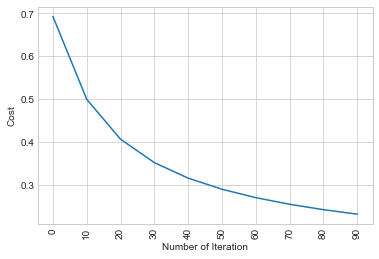

NameError: name 'i' is not defined

In [22]:
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=100)

In [23]:
# skiler with lR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9824561403508771
